In [65]:
import zipfile
import os 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer


features = [
#     'Channel',
#     'Region',
    'Fresh',
    'Milk',
    'Grocery',
    'Frozen',
    'Detergents_Paper',
    'Delicatessen'
]


%matplotlib inline

In [3]:
with zipfile.ZipFile('Project.zip', 'r') as f:
    f.extractall('./project')


In [4]:
df = pd.read_csv('./project/Project/Data/Wholesale customers data.csv')

In [5]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [10]:
df['Channel'] = df['Channel'].astype("category")
df['Region'] = df['Region'].astype("category")

In [11]:
df = df.rename(columns={'Delicassen': 'Delicatessen'})
df['Channel'] = df['Channel'].map({1: 'HoReCa', 2: 'Retail'})
df['Region'] = df['Region'].map({1: 'Lisbon', 2: 'Porto', 3:'Other'})

In [13]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,HoReCa,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [14]:
df.Region.value_counts()

Other     316
Lisbon     77
Porto      47
Name: Region, dtype: int64

In [19]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [20]:
df.to_csv("data_processed.csv")

In [22]:
features = df.columns

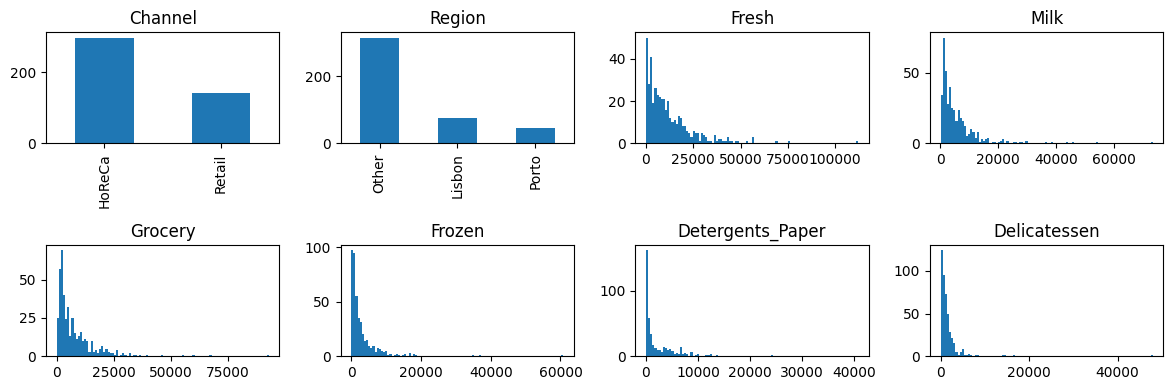

In [23]:
fig, axes = plt.subplots(2, 4, figsize=(12, 4))

for feature, ax in zip(features, axes.ravel()):
    if (feature=='Channel') | (feature=='Region'):
        df[feature].value_counts().plot.bar(ax=ax)
    else:
        ax.hist(df[feature], bins=100)
    ax.set_title(feature)
plt.tight_layout()

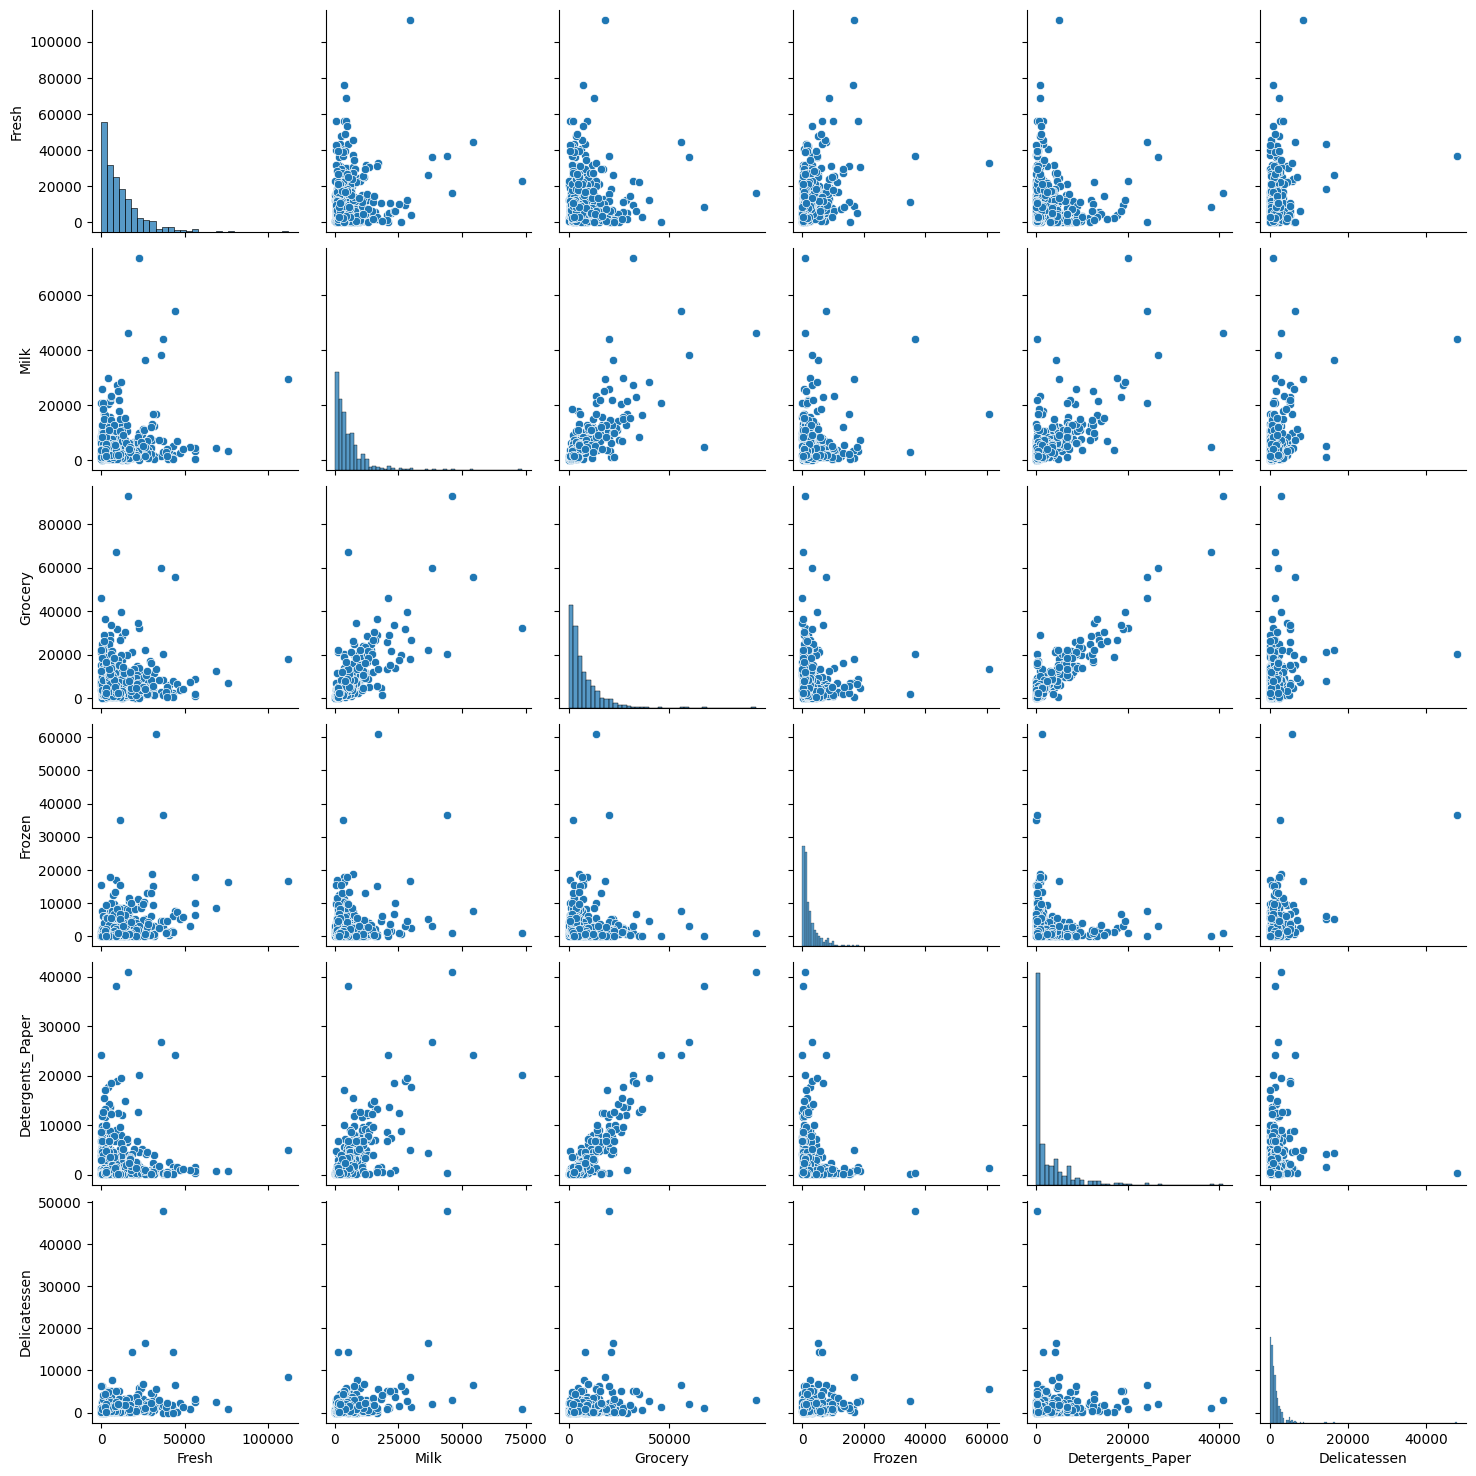

In [24]:
sns.pairplot(df)

In [28]:
scaler = StandardScaler()
data = scaler.fit_transform(df[features])

In [30]:
np.save('training_data.npy', data)

In [31]:
pca = PCA(n_components=2)
res_pca = pca.fit_transform(data)

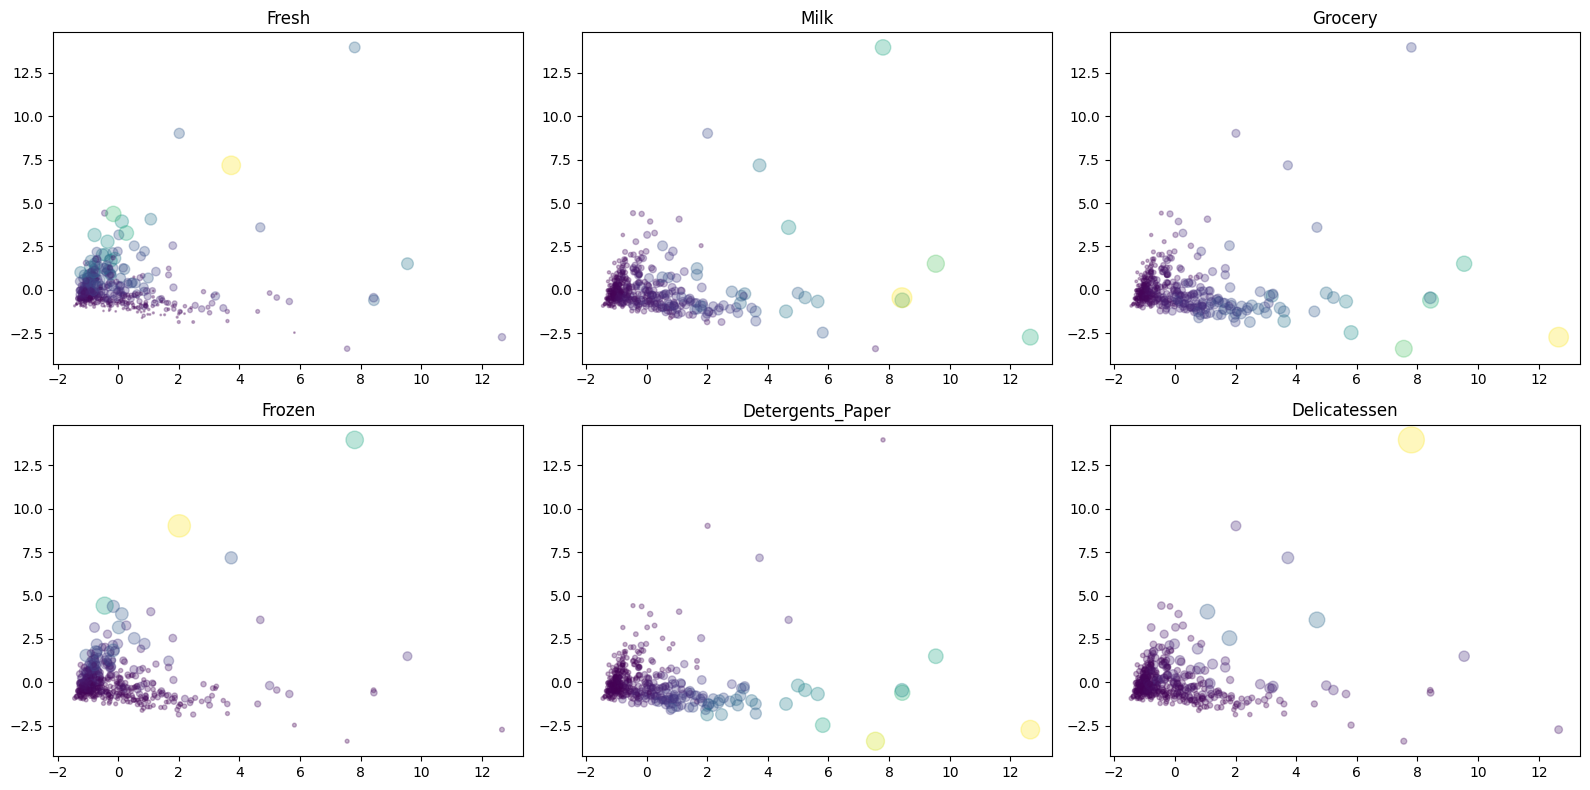

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    sizes = 20+20*data[:, features.index(feature)]
    ax.scatter(res_pca[:, 0], res_pca[:, 1], s=sizes, alpha=0.3, c=df[feature], cmap=cols)
    ax.set_title(feature)
plt.tight_layout()

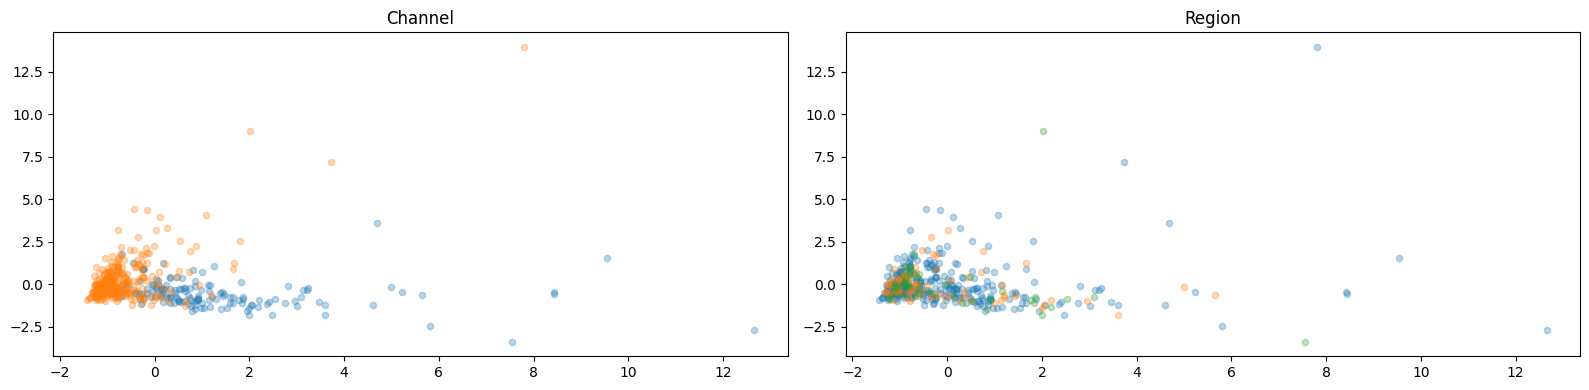

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
for feature, ax in zip(['Channel', 'Region'], axes):
    cols = 'Pastel1'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(res_pca[df[feature]==unique_val, 0], res_pca[df[feature]==unique_val, 1], s=20, alpha=0.3)
        ax.set_title(feature)
plt.tight_layout()

In [41]:
kpca = KernelPCA(n_components=2, kernel='rbf', degree=2)
res_kpca_poly = kpca.fit_transform(data)

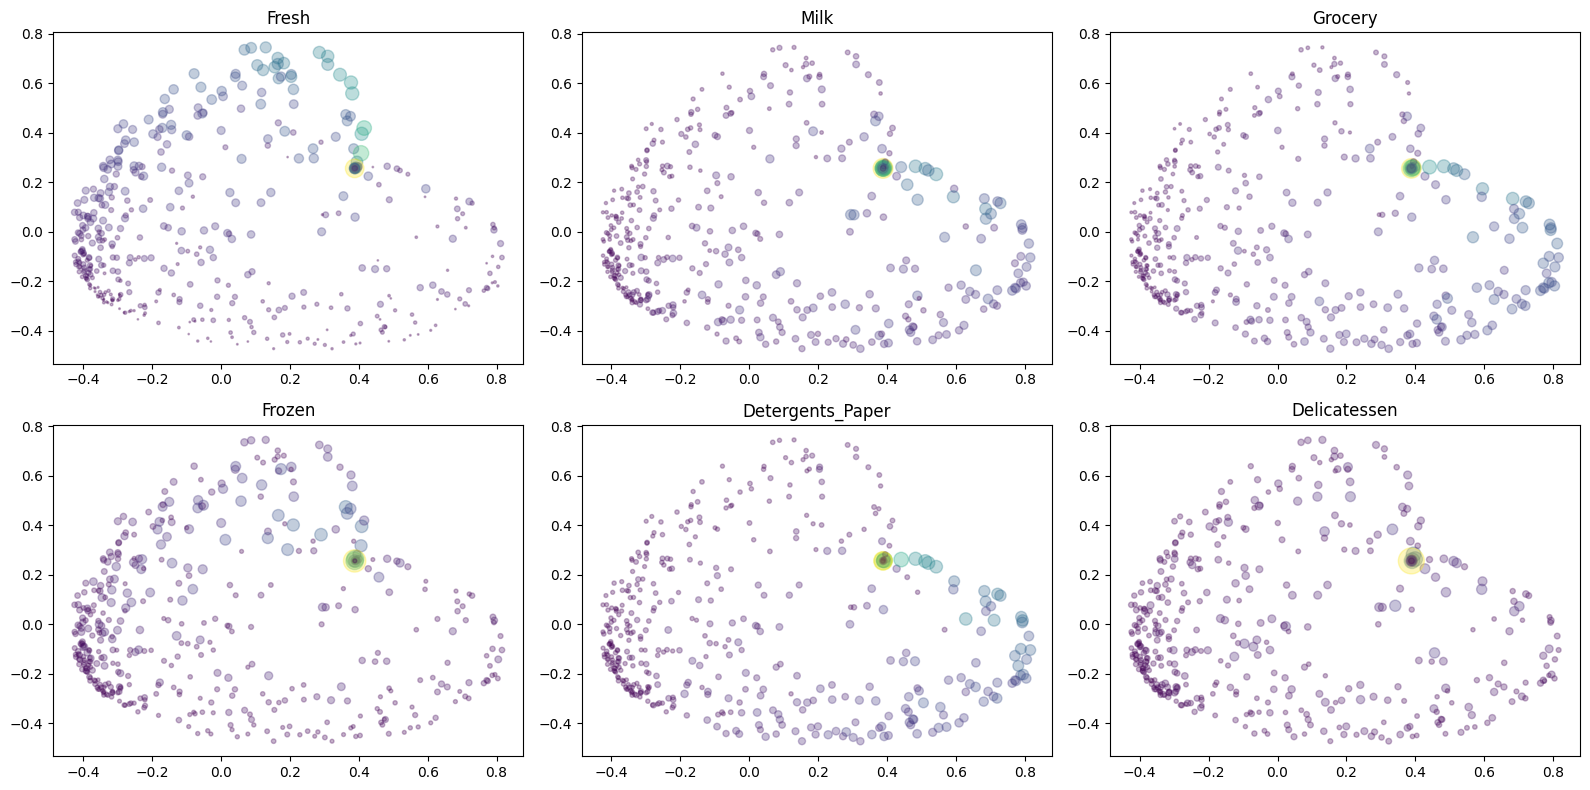

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    sizes = 20+20*data[:, features.index(feature)]
    ax.scatter(res_kpca_poly[:, 0], res_kpca_poly[:, 1], s=sizes, alpha=0.3, c=df[feature], cmap=cols)
    ax.set_title(feature)
plt.tight_layout()

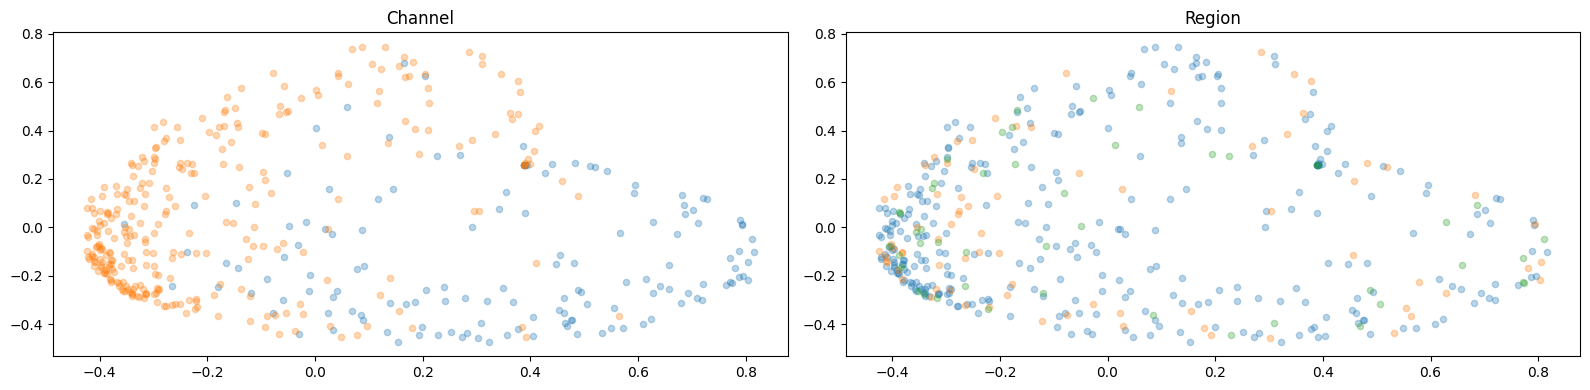

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
for feature, ax in zip(['Channel', 'Region'], axes):
    cols = 'Pastel1'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(res_kpca_poly[df[feature]==unique_val, 0], res_kpca_poly[df[feature]==unique_val, 1], s=20, alpha=0.3)
        ax.set_title(feature)
plt.tight_layout()

In [48]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.05)
res_kpca_rbf = kpca.fit_transform(data)

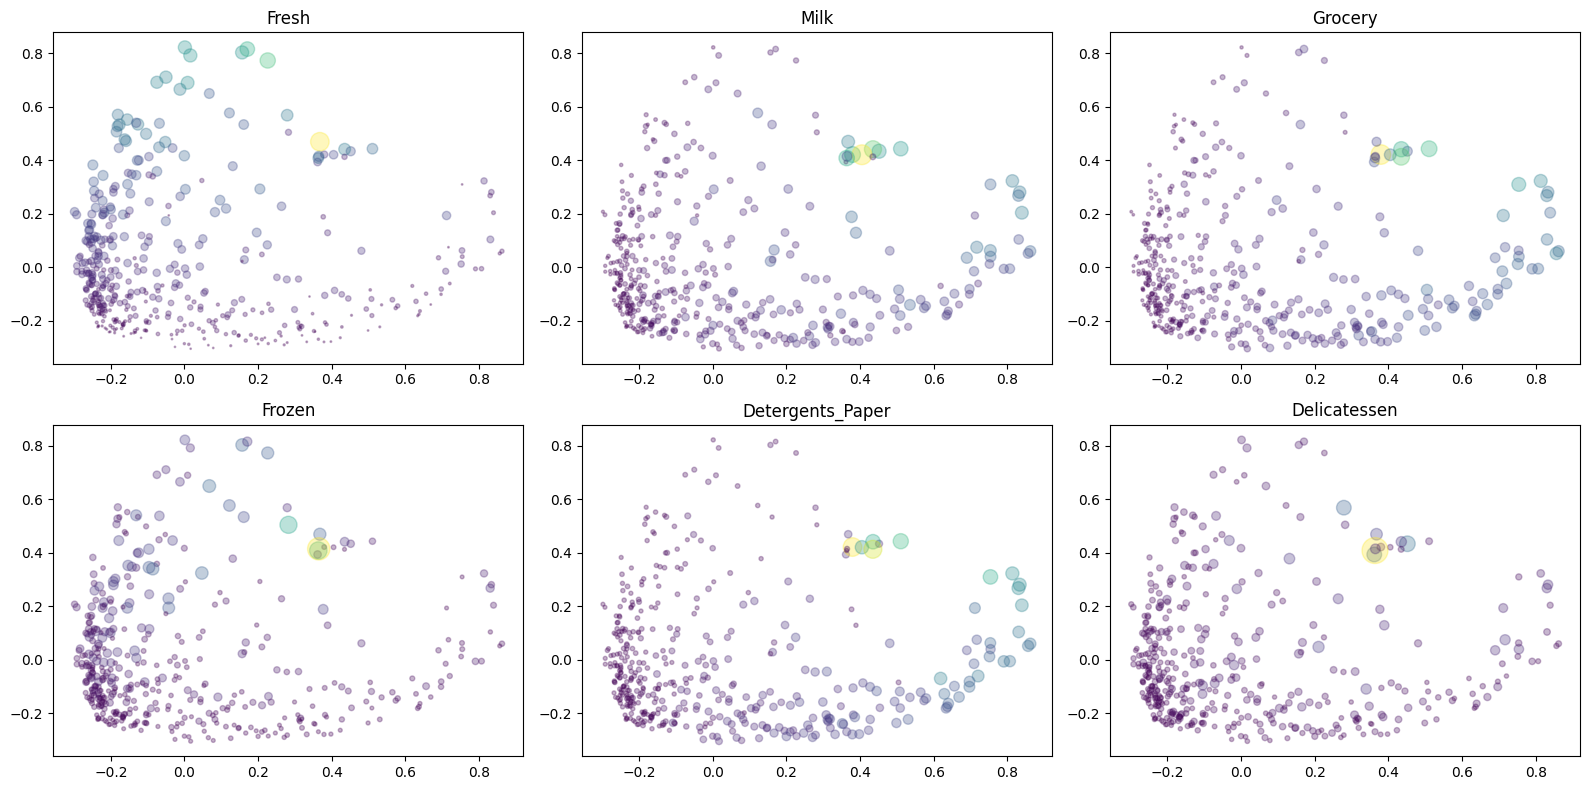

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    sizes = 20+20*data[:, features.index(feature)]
    ax.scatter(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1], s=sizes, alpha=0.3, c=df[feature], cmap=cols)
    ax.set_title(feature)
plt.tight_layout()

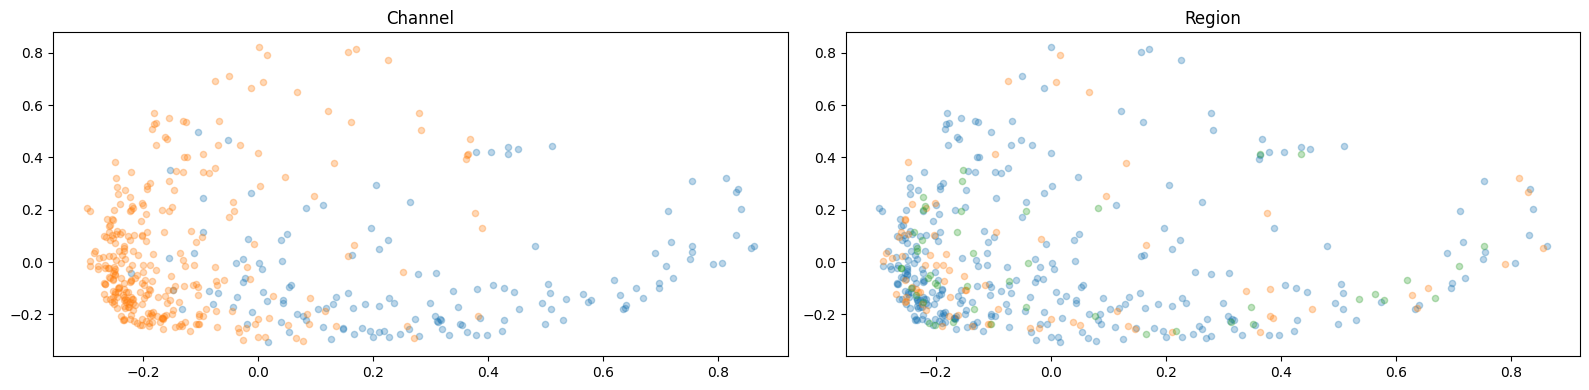

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
for feature, ax in zip(['Channel', 'Region'], axes):
    cols = 'Pastel1'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(res_kpca_rbf[df[feature]==unique_val, 0], res_kpca_rbf[df[feature]==unique_val, 1], s=20, alpha=0.3)
        ax.set_title(feature)
plt.tight_layout()

In [44]:
kpca = KernelPCA(n_components=2, kernel='cosine')
res_kpca_cos = kpca.fit_transform(data)

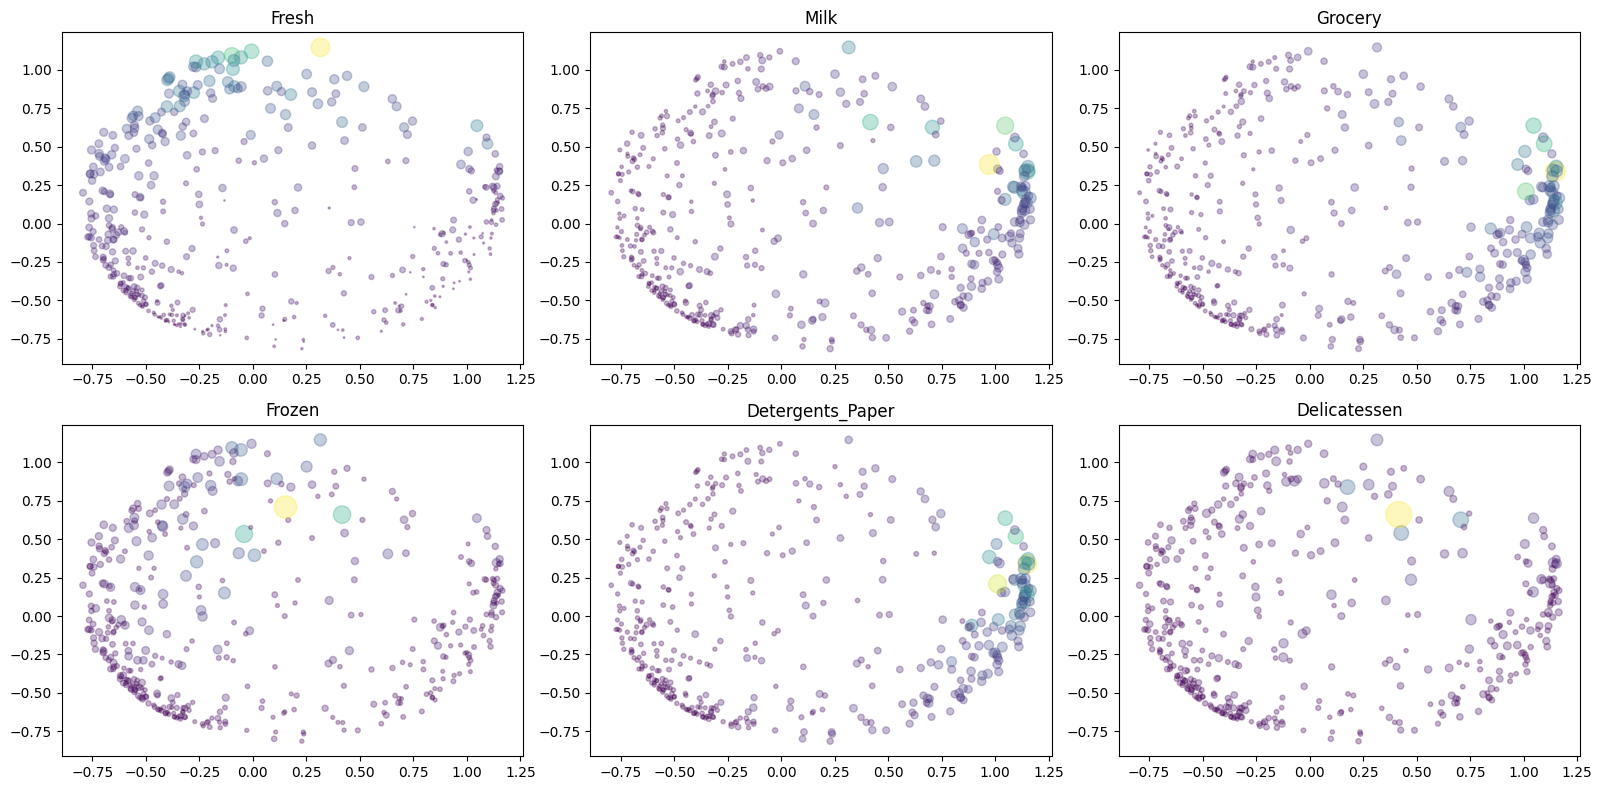

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    sizes = 20+20*data[:, features.index(feature)]
    ax.scatter(res_kpca_cos[:, 0], res_kpca_cos[:, 1], s=sizes, alpha=0.3, c=df[feature], cmap=cols)
    ax.set_title(feature)
plt.tight_layout()

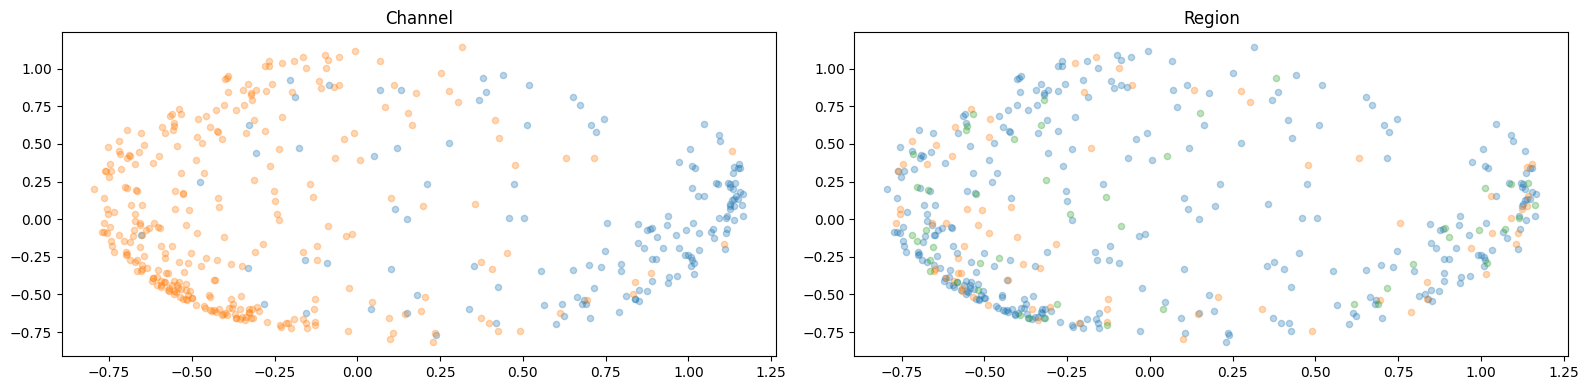

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
for feature, ax in zip(['Channel', 'Region'], axes):
    cols = 'Pastel1'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(res_kpca_cos[df[feature]==unique_val, 0], res_kpca_cos[df[feature]==unique_val, 1], s=20, alpha=0.3)
        ax.set_title(feature)
plt.tight_layout()

In [52]:
df['x_kpca_rbf'] = res_kpca_rbf[:, 0]
df['y_kpca_rbf'] = res_kpca_rbf[:, 1]

df['x_kpca_poly'] = res_kpca_poly[:, 0]
df['y_kpca_poly'] = res_kpca_poly[:, 1]

df['x_kpca_cos'] = res_kpca_cos[:, 0]
df['y_kpca_cos'] = res_kpca_cos[:, 1]

In [53]:
df.to_csv('data_with_latent.csv')

In [58]:
res_kpca = df[['x_kpca_rbf', 'y_kpca_rbf']].to_numpy()

In [59]:
clusterer = KMeans(n_clusters=5)
clusters = clusterer.fit_predict(res_kpca)

c:\Users\Khaled\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [60]:
markers = list('*hH+xXDd|.,ov^<>12348spP')

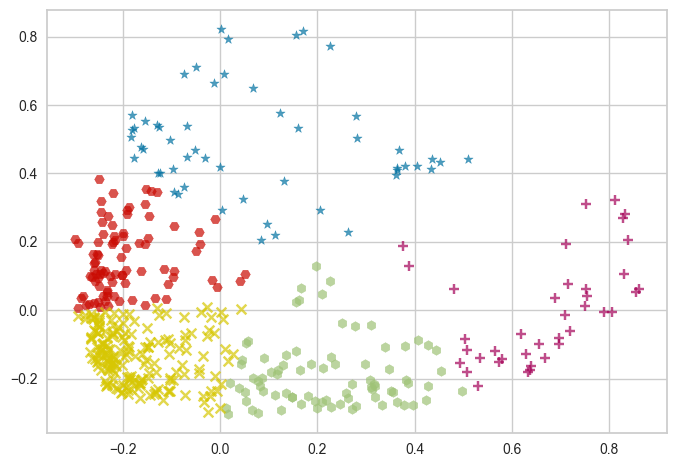

In [61]:
for cluster in np.unique(clusters):
    cluster_data = res_kpca[clusters==cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], alpha=0.7, marker=markers[cluster])

C:\Users\Khaled\AppData\Local\Temp\ipykernel_3964\2956788956.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(cluster_data[:, 0], cluster_data[:, 1], s=sizes, alpha=0.6, cmap=cols, marker=markers[cluster], label=f'Cluster {cluster}')


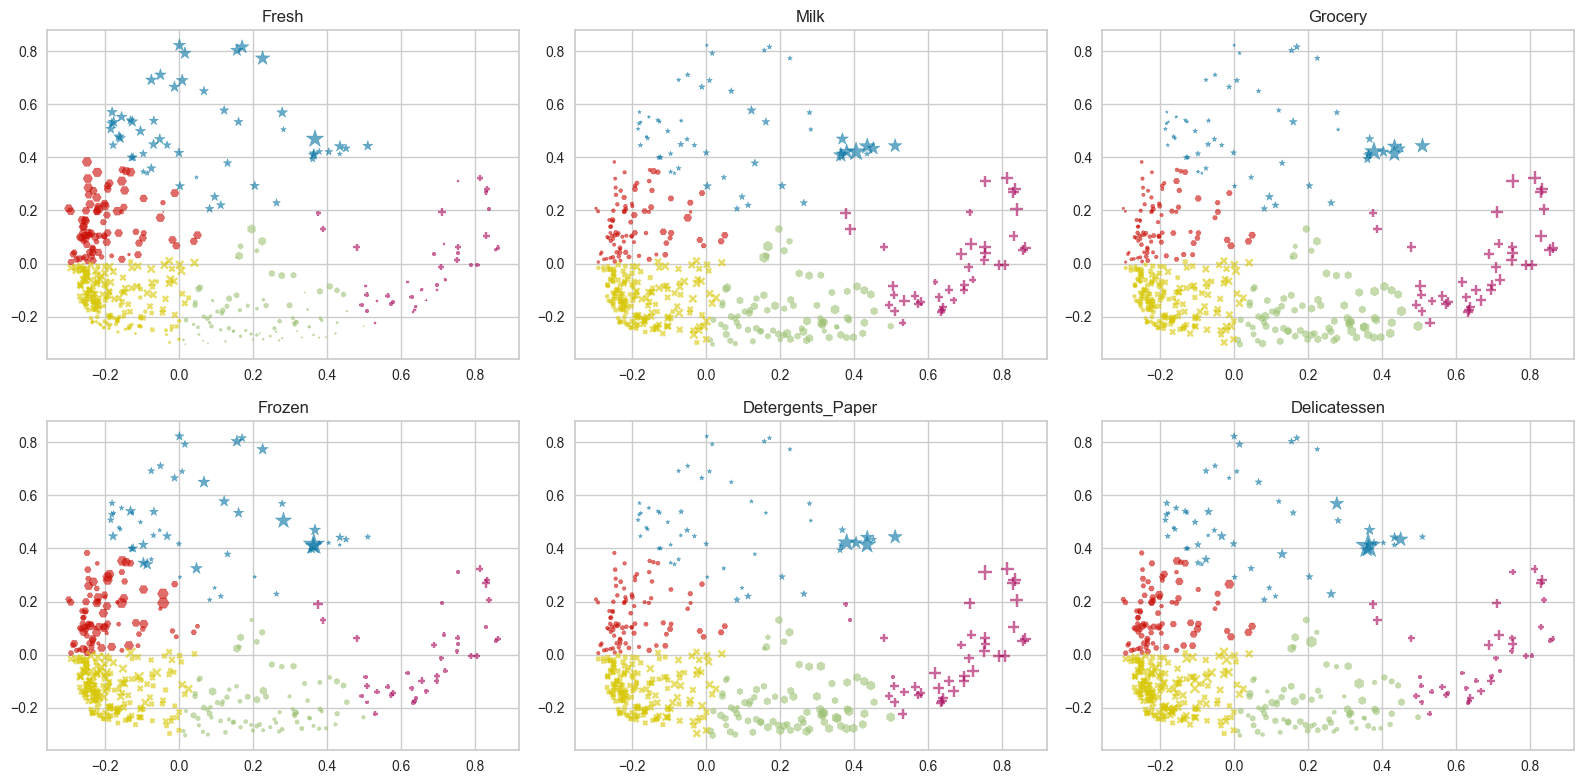

In [62]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    for cluster in np.unique(clusters):
        sizes = 20+20*data[:, features.index(feature)][clusters==cluster]
        cluster_data = res_kpca[clusters==cluster]
        ax.scatter(cluster_data[:, 0], cluster_data[:, 1], s=sizes, alpha=0.6, cmap=cols, marker=markers[cluster], label=f'Cluster {cluster}')
    ax.set_title(feature)
plt.tight_layout()

In [63]:
df['cluster_kpca_rbf'] = clusters
df.to_csv('data_with_clusters.csv')

c:\Users\Khaled\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Khaled\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Khaled\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Khaled\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

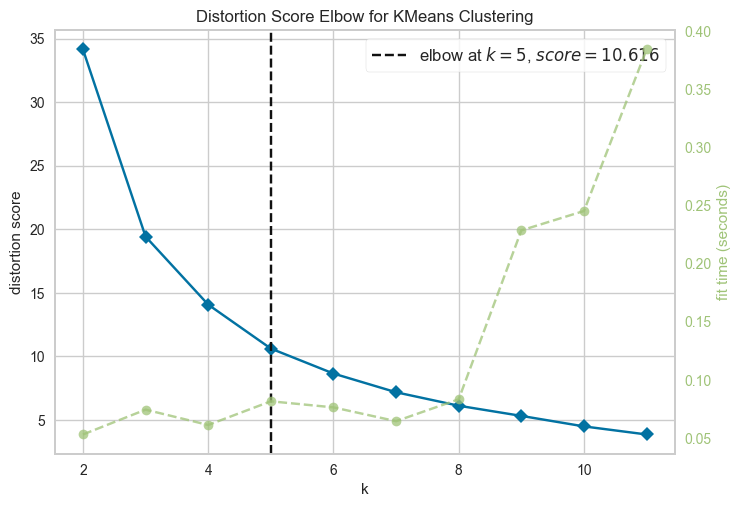

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
clusterer = KMeans()
visualizer = KElbowVisualizer(clusterer, k=(2, 12), metric='distortion')

visualizer.fit(res_kpca)        
visualizer.show()